In [1]:
import pandas as pd
import numpy as np
import warnings

# todo: to hide warnings
warnings.filterwarnings('ignore') 

## DATA IMPORT AND INSPECTION


In [2]:

summer=pd.read_csv("C:\\Users\\ADMIN\\Desktop\\Case_Study\\summer.csv")
winter=pd.read_csv("C:\\Users\\ADMIN\\Desktop\\Case_Study\\winter.csv")
dictionary=pd.read_csv("C:\\Users\\ADMIN\\Desktop\\Case_Study\\dictionary.csv")

# Summer - 31164 Records
# Winter - 5770 Records
# Combined - 36934


# Summer Columns:
# ['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender', 'Event', 'Medal']
# EXAMPLE
#    Year    City     Sport Discipline        Athlete Country Gender             Event Medal  
#   1896  Athens  Aquatics   Swimming  HAJOS, Alfred     HUN    Men    100M Freestyle  Gold  


# Dictionary COlumns:
# ['Country', 'Code', 'Population', 'GDP per Capita']
# EXAMPLE
#        Country Code  Population  GDP per Capita
# 0  Afghanistan  AFG  32526562.0      594.323081

In [3]:
olympics1=pd.concat([summer,winter],axis=0,keys=["Summer","Winter"],names=["Edition"]).reset_index()
# keys - used to categorize/define the data
# names - provides the keys info and also the individual index info
# .reset_index() - to reset the index, since after merge seperate indexing will be applied

# deleting it since the individual indexing based on the source, is not needed
del olympics1["level_1"]


olympics1.to_excel("olympics1_data.xlsx",index=False)

In [4]:
# Adding Country to the olympics df, from dictionary df
olympics2=pd.merge(olympics1,dictionary[["Code","Country"]],how="left",left_on="Country",right_on="Code")
print(olympics2.head())
# print(len(olympics2))
# print(olympics2[olympics2.Country_y=="ZZX"])
# print(olympics2.sort_values(by='Code', ascending=False))
olympics2.to_excel("olympics2_data.xlsx",index=False)


  Edition  Year    City     Sport Discipline             Athlete Country_x  \
0  Summer  1896  Athens  Aquatics   Swimming       HAJOS, Alfred       HUN   
1  Summer  1896  Athens  Aquatics   Swimming    HERSCHMANN, Otto       AUT   
2  Summer  1896  Athens  Aquatics   Swimming   DRIVAS, Dimitrios       GRE   
3  Summer  1896  Athens  Aquatics   Swimming  MALOKINIS, Ioannis       GRE   
4  Summer  1896  Athens  Aquatics   Swimming  CHASAPIS, Spiridon       GRE   

  Gender                       Event   Medal Code Country_y  
0    Men              100M Freestyle    Gold  HUN   Hungary  
1    Men              100M Freestyle  Silver  AUT   Austria  
2    Men  100M Freestyle For Sailors  Bronze  GRE    Greece  
3    Men  100M Freestyle For Sailors    Gold  GRE    Greece  
4    Men  100M Freestyle For Sailors  Silver  GRE    Greece  


## DATA CLEANING - PART 1

In [5]:
# Deleting a duplicate country code column
del olympics2["Code"]

# Renaming for better understanding
olympics2=olympics2.rename(columns={"Country_x":"Code","Country_y":"Country"})

print(olympics2.columns.tolist())
# ['Edition', 'Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Gender', 'Event', 'Medal', 'Code', 'Country']

print(dictionary.columns.tolist())
# ['Country', 'Code', 'Population', 'GDP per Capita']

dictionary=dictionary.rename(columns={"GDP per Capita":"GDPperCapita"})

# mask1=olympics2.Country.isnull()
olympics2.to_excel("olympics2.xlsx",index=False)


['Edition', 'Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Code', 'Gender', 'Event', 'Medal', 'Country']
['Country', 'Code', 'Population', 'GDP per Capita']


In [6]:
print(dictionary.head())

           Country Code  Population  GDPperCapita
0      Afghanistan  AFG  32526562.0    594.323081
1          Albania  ALB   2889167.0   3945.217582
2          Algeria  ALG  39666519.0   4206.031232
3  American Samoa*  ASA     55538.0           NaN
4          Andorra  AND     70473.0           NaN


In [7]:
# Mask/Filter to get the rows where there are no Country names
mask1=olympics2.Country.isnull()

# To get the unique rows with no country names
unique_null_country_data=olympics2.loc[mask1][["Code","Country"]].drop_duplicates(subset="Code",keep="first").reset_index()
unique_null_country_data


,index,Code,Country
0,132,ZZX,NaN
1,275,BOH,NaN
2,1146,ANZ,NaN
3,1852,RU1,NaN
4,3577,TCH,NaN
5,4587,YUG,NaN
6,4730,ROU,NaN
7,8114,URS,NaN
8,8940,EUA,NaN
9,9977,BWI,NaN


In [8]:
# Create a dictionary with the missing countries info
null_country_dict={
    "ZZX":"Mixed teams",
    "BOH":"Bohemia",
    "ANZ":"Australasia",
    "RU1":"Russian Empire",
    "TCH":"Czechoslavakia",
    "YUG":"Yugoslavia",
    "ROU":"Romania",
    "URS":"Soviet Union",
    "EUA":"United Team of Germany",
    "BWI":"West Indies Federation",
    "GDR":"East Germany",
    "FRG":"West Germany",
    "EUN":"Unified Team",
    "IOP":"Independent Olympic Participants",
    "SRB":"Serbia",
    "NaN":"NaN",
    "TTO":"Trinidad and Tobago",
    "MNE":"Montenegro",
    "SGP":"Singapore"
}

# Convert the above dict to df
dict2=pd.DataFrame(list(null_country_dict.items()),columns=["Code","Country"])
dict2

# print(len(dictionary)) 
# 201 Records
# print(len(dict2))
# 19 Records
# print(dictionary.columns.tolist()) 
# ['Country', 'Code', 'Population', 'GDPperCapita']
# print(dict2.columns.tolist())
# ['Code', 'Country']

# Update the Dicionary
dictionary=pd.concat([dictionary,dict2],axis=0,join="outer")

# For checking
dictionary.to_excel("Updated_dict.xlsx",index=False)


In [9]:
# Merge the olympics df and the new dict2 df, with the missing countries info
olympics3=pd.merge(olympics2,dict2,how="left",on="Code")
print(olympics3.head())

# Adjusting the column values
olympics3["Country_x"] = olympics3['Country_x'].fillna(olympics3["Country_y"])

# # Removing the duplicate country code column, generated after the merging
del olympics3["Country_y"]

# # Renaming the Columns, for better understanding
olympics3=olympics3.rename(columns={"Country_x":"Country"})

print(olympics3.columns.tolist())

# For checking
olympics3.to_excel("After_Adding_New_Countries_Info.xlsx",index=False)

  Edition  Year    City     Sport Discipline             Athlete Code Gender  \
0  Summer  1896  Athens  Aquatics   Swimming       HAJOS, Alfred  HUN    Men   
1  Summer  1896  Athens  Aquatics   Swimming    HERSCHMANN, Otto  AUT    Men   
2  Summer  1896  Athens  Aquatics   Swimming   DRIVAS, Dimitrios  GRE    Men   
3  Summer  1896  Athens  Aquatics   Swimming  MALOKINIS, Ioannis  GRE    Men   
4  Summer  1896  Athens  Aquatics   Swimming  CHASAPIS, Spiridon  GRE    Men   

                        Event   Medal Country_x Country_y  
0              100M Freestyle    Gold   Hungary       NaN  
1              100M Freestyle  Silver   Austria       NaN  
2  100M Freestyle For Sailors  Bronze    Greece       NaN  
3  100M Freestyle For Sailors    Gold    Greece       NaN  
4  100M Freestyle For Sailors  Silver    Greece       NaN  
['Edition', 'Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Code', 'Gender', 'Event', 'Medal', 'Country']


## DATA CLEANING - PART 2

In [10]:
# To remove the rows with null in the Code column
olympics3=olympics3.dropna(subset=["Code"]).reset_index()
print(olympics3.columns.tolist())

print(olympics3.tail())

['index', 'Edition', 'Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Code', 'Gender', 'Event', 'Medal', 'Country']
       index Edition  Year   City   Sport Discipline             Athlete Code  \
36926  36930  Winter  2014  Sochi  Skiing  Snowboard        JONES, Jenny  GBR   
36927  36931  Winter  2014  Sochi  Skiing  Snowboard     ANDERSON, Jamie  USA   
36928  36932  Winter  2014  Sochi  Skiing  Snowboard  MALTAIS, Dominique  CAN   
36929  36933  Winter  2014  Sochi  Skiing  Snowboard        SAMKOVA, Eva  CZE   
36930  36934  Winter  2014  Sochi  Skiing  Snowboard    TRESPEUCH, Chloe  FRA   

      Gender            Event   Medal         Country  
36926  Women       Slopestyle  Bronze  United Kingdom  
36927  Women       Slopestyle    Gold   United States  
36928  Women  Snowboard Cross  Silver          Canada  
36929  Women  Snowboard Cross    Gold  Czech Republic  
36930  Women  Snowboard Cross  Bronze          France  


In [12]:
# Removing the duplicate index columns, which are not required
# olympics3=olympics3.drop(columns=["level_0","index"])


In [13]:
# Ordered Categorical - creating a hierarchial order for the values in a column
olympics3['Medal'] = pd.Categorical(olympics3['Medal'], categories=['Bronze', 'Silver', 'Gold'], ordered=True)
olympics3["Medal"]

0          Gold
1        Silver
2        Bronze
3          Gold
4        Silver
          ...  
36926    Bronze
36927      Gold
36928    Silver
36929      Gold
36930    Bronze
Name: Medal, Length: 36931, dtype: category
Categories (3, object): ['Bronze' < 'Silver' < 'Gold']

## What are the most successful countries of all time ?

--- Using Seaborn,
1. What are the top 10 Countries by total medals
2. Split the total medals of Top10 Countries into Summer/Winter. Are there typical Summer?Winter Games Countries
3. Split the total medals of Top 10 Countries into Gold, Silver, Bronze

Country
United States     5238
Soviet Union      2489
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
Sweden            1477
Canada            1274
Australia         1204
Hungary           1091
Name: count, dtype: int64


Text(0.5, 1.0, 'Top 10 Counties with highest no.of medals')

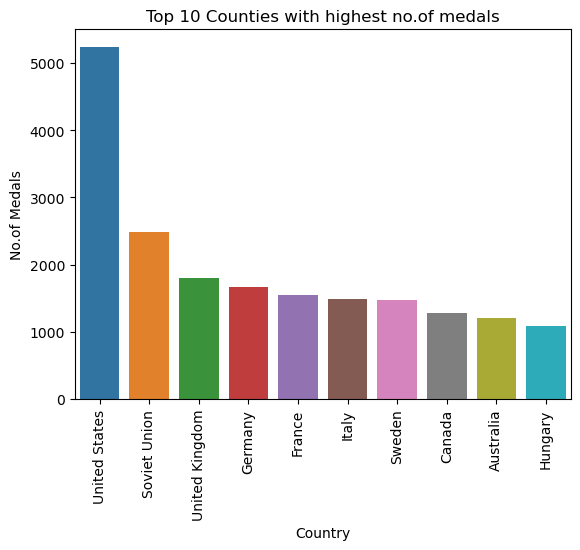

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a series, with the frequency of occurance, of the country names in the "Country" column
country_count=olympics3.Country.value_counts().head(10)

print(country_count)

# Creating a bar plot
sns.barplot(x=country_count.index,y=country_count.values)
# To rotate the x-axis values
plt.xticks(rotation=90)

plt.xlabel('Country')
plt.ylabel('No.of Medals')
plt.title('Top 10 Counties with highest no.of medals')

# plt.show()



Text(0.5, 1.0, 'Top 10 Counties with summer and winter olympics categorization')

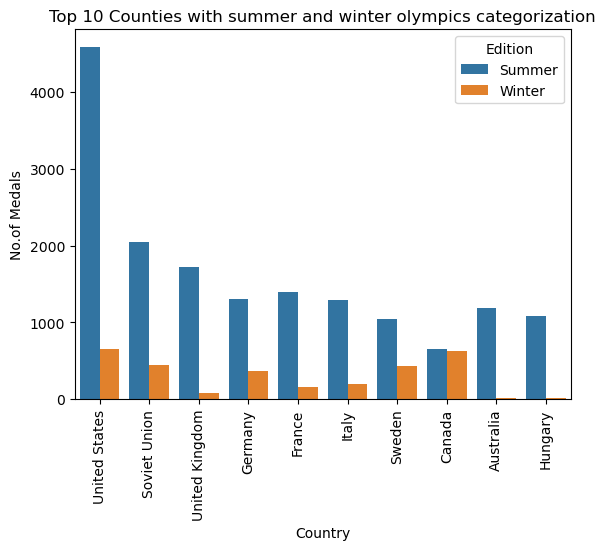

In [15]:
# Other way-1,
# country_count_df=pd.DataFrame(country_count,columns=["country","count"])
# print(country_count_df.columns.tolist())

# other way-2,
# top_ten_countries_df = olympics3[olympics3.Country.isin(country_count.index)]
# print(len(top_ten_countries_df))
# sns.countplot(data = top_ten_countries_df, x = 'Country', hue='Edition', order = country_count.index)

#
sns.countplot(data = olympics3, x = 'Country', hue='Edition', order = country_count.index)

plt.xticks(rotation=90)

plt.xlabel('Country')
plt.ylabel('No.of Medals')
plt.title('Top 10 Counties with summer and winter olympics categorization')


In [16]:
# Countries which haven't received any medals
# Below code is checking if there are any country codes in dictionary.Code which are not present in olympics3.Code
# ~ is the represntaion for not
no_medal_countries = dictionary[~dictionary.Code.isin(olympics3.Code)].reset_index()
no_medal_countries["Country"]

0                 Albania
1         American Samoa*
2                 Andorra
3                  Angola
4     Antigua and Barbuda
             ...         
67              Swaziland
68           Turkmenistan
69                Vanuatu
70                  Yemen
71                    NaN
Name: Country, Length: 72, dtype: object

Text(0.5, 1.0, 'Top 10 Counties with Medals categorization')

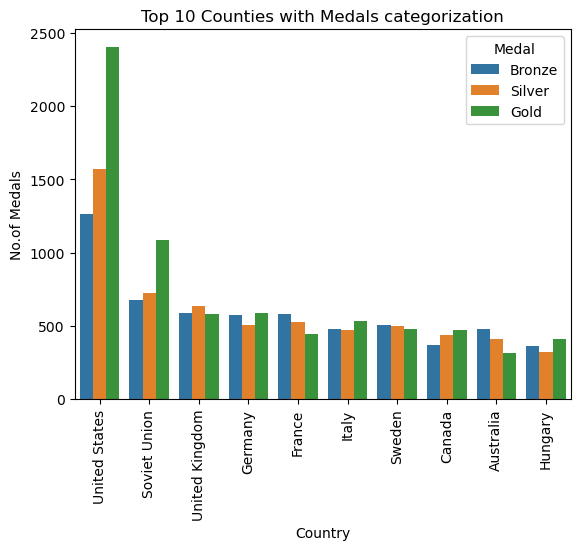

In [17]:
sns.countplot(data=olympics3, x="Country", hue="Medal",  order = country_count.index)


plt.xticks(rotation=90)

plt.xlabel('Country')
plt.ylabel('No.of Medals')
plt.title('Top 10 Counties with Medals categorization')

## Do GDP, Population and Politics Matter

In [18]:
country_medals=olympics3.groupby(["Country","Medal"]).size().unstack()

# Update the Dictionary df with the individual medals data
dictionary=pd.merge(dictionary,country_medals,on="Country",how="left")

countries_medal_count=olympics3.Country.value_counts()

# Update the Dictionary df with the all medals count data
dictionary=pd.merge(dictionary,countries_medal_count,on="Country",how="left")

country_games=olympics3.groupby("Country")['Sport'].nunique()

# Update he Dictionary df with the count of unique games, it particiaped
dictionary=pd.merge(dictionary,country_games,on="Country",how="left")

# Renaming the column for better understanding
dictionary=dictionary.rename(columns={"Sport":"Total_Games"})

# Adding ranks to the countries based on the coun of the medals
dictionary["Total"]=dictionary["count"].rank(ascending=False)

print(dictionary.sort_values(by="count",ascending=False).head(12))



            Country Code   Population  GDPperCapita  Bronze  Silver    Gold  \
191   United States  USA  321418820.0  56115.718426  1265.0  1571.0  2402.0   
208    Soviet Union  URS          NaN           NaN   677.0   724.0  1088.0   
190  United Kingdom  GBR   65138232.0  43875.969614   587.0   632.0   580.0   
70          Germany  GER   81413145.0  41313.313995   572.0   504.0   589.0   
66           France  FRA   66808385.0  36205.568102   578.0   526.0   444.0   
90            Italy  ITA   60802085.0  29957.804315   481.0   473.0   534.0   
174          Sweden  SWE    9798871.0  50579.673649   505.0   496.0   476.0   
34           Canada  CAN   35851774.0  43248.529909   369.0   435.0   470.0   
10        Australia  AUS   23781169.0  56310.962993   479.0   408.0   317.0   
82          Hungary  HUN    9844686.0  12363.543460   359.0   320.0   412.0   
150          Russia  RUS  144096812.0   9092.580536   370.0   328.0   333.0   
135          Norway  NOR    5195921.0  74400.369777 

## Satisical Analysis and Hypothesis Testing with scipy

In the following work wih Ranks. Check whehter GDP (standard of living), Total_Games (Political Stability Measure) and POpulatuion (Size) ahve an effect on he Total Medals.

In [19]:
from scipy.stats import spearmanr

dict_analysis=dictionary.corr(numeric_only=True,method="spearman")
print(dict_analysis)

# -1	Perfect negative linear relationship
# -0.7	Strong negative linear relationship
# -0.5	Moderate negative linear relationship
# -0.3	Weak negative linear relationship
# 0	No linear relationship
# 0.3	Weak positive linear relationship
# 0.5	Moderate positive linear relationship
# 0.7	Strong positive linear relationship
# 1	Perfect positive linear relationship


              Population  GDPperCapita    Bronze    Silver      Gold  \
Population      1.000000     -0.168448  0.378007  0.416854  0.413525   
GDPperCapita   -0.168448      1.000000  0.455225  0.447793  0.437059   
Bronze          0.378007      0.455225  1.000000  0.873904  0.887504   
Silver          0.416854      0.447793  0.873904  1.000000  0.875694   
Gold            0.413525      0.437059  0.887504  0.875694  1.000000   
count           0.419755      0.458478  0.956019  0.956506  0.931520   
Total_Games     0.374713      0.517866  0.911192  0.883741  0.874380   
Total          -0.419755     -0.458478 -0.956019 -0.956506 -0.931520   

                 count  Total_Games     Total  
Population    0.419755     0.374713 -0.419755  
GDPperCapita  0.458478     0.517866 -0.458478  
Bronze        0.956019     0.911192 -0.956019  
Silver        0.956506     0.883741 -0.956506  
Gold          0.931520     0.874380 -0.931520  
count         1.000000     0.923434 -1.000000  
Total_Games   0

## Aggregating and Ranking

Create the following Seaborn Heatmap with Medal Ranks for Top 50 Countries(Total Medals, Summer Games Medals, Winter Games Medals, Men, Woman)

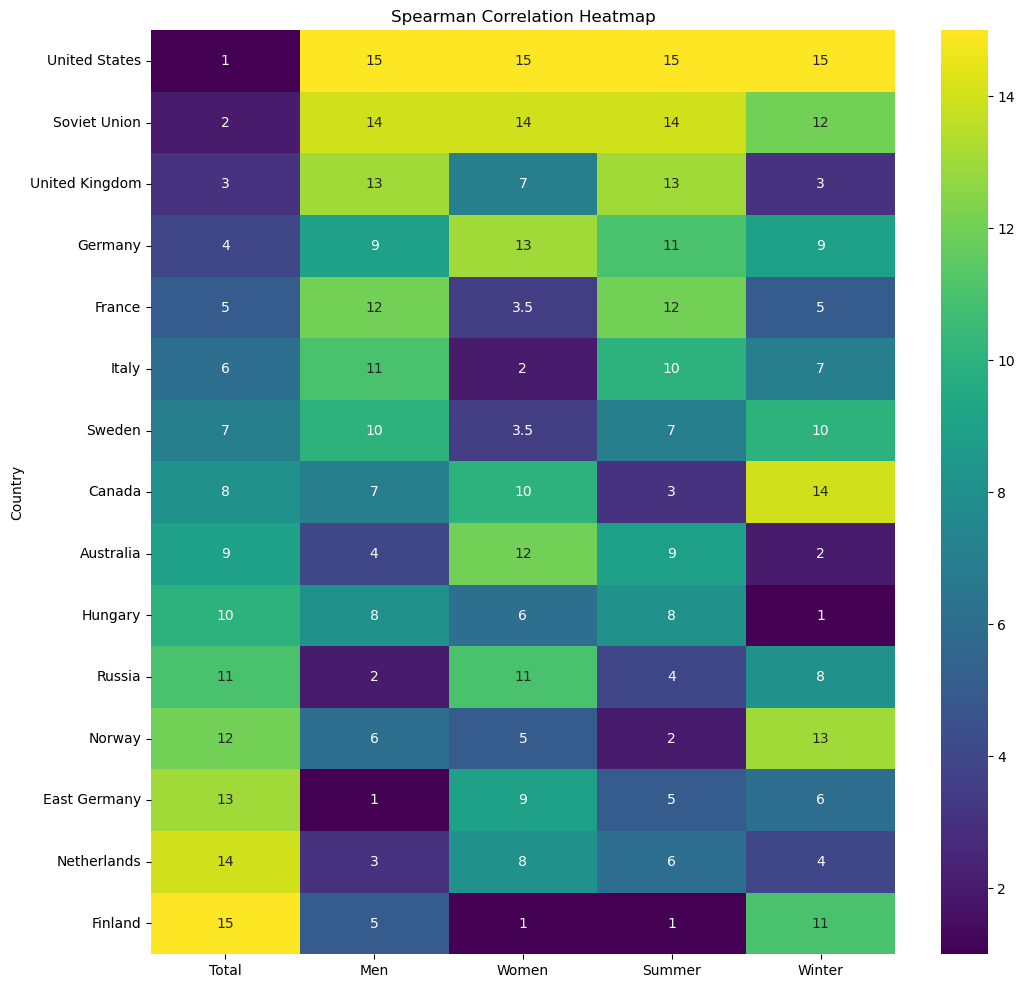

In [20]:
temp=dictionary[["Country","Total"]]
# print(temp)

temp1=olympics3.groupby(["Country","Gender"]).size().unstack()
# print(temp1)
# print(temp1.loc["West Germany"])

temp2=olympics3.groupby(["Country","Edition"]).size().unstack()
# print(temp2)

temp=pd.merge(temp,temp1,on="Country",how="left")
temp=pd.merge(temp,temp2,on="Country",how="left")

olympics_analysis=temp.sort_values(by='Total')
olympics_analysis.set_index("Country",inplace=True)

# Taking a subset of top 15, for the headmap generation
olympics_analysis_rank=olympics_analysis.head(15).rank()

plt.figure(figsize=(12, 12))
sns.heatmap(olympics_analysis_rank,annot=True, cmap='viridis')
plt.title('Spearman Correlation Heatmap')
plt.show()

## Summer Games vs Winter Games - does Geographical Location Matter ?

Identify Countries that are
1. equally succesful in Summer and Winter Games
2. more successful in Summer Games
3. more successful in Winter Games

In [21]:
# Creating masks based on conditions
equal=olympics_analysis.Summer==olympics_analysis.Winter
more_summer=olympics_analysis.Summer>olympics_analysis.Winter
more_winter=olympics_analysis.Summer<olympics_analysis.Winter

print("Countries where, Both summer and winter olympic medals are equal \n\n",olympics_analysis.loc[equal])
print("-----------------------------------")
print("Countries where, summer olympic medals are greater than winter olympic medals \n\n",olympics_analysis.loc[more_summer])
print("-----------------------------------")
print("Countries where, winter olympic medals are greater than summer olympic medals \n\n",olympics_analysis.loc[more_winter])


Countries where, Both summer and winter olympic medals are equal 

             Total  Men  Women  Summer  Winter
Country                                      
Luxembourg  108.5  4.0    NaN     2.0     2.0
-----------------------------------
Countries where, summer olympic medals are greater than winter olympic medals 

                         Total     Men   Women  Summer  Winter
Country                                                      
United States             1.0  3618.0  1620.0  4585.0   653.0
Soviet Union              2.0  1807.0   682.0  2049.0   440.0
United Kingdom            3.0  1470.0   329.0  1720.0    79.0
Germany                   4.0  1119.0   546.0  1305.0   360.0
France                    5.0  1351.0   197.0  1396.0   152.0
Italy                     6.0  1292.0   196.0  1296.0   192.0
Sweden                    7.0  1280.0   197.0  1044.0   433.0
Canada                    8.0   814.0   460.0   649.0   625.0
Australia                 9.0   704.0   500.0  1189.0    

## Men vs Women - does Culture & Relgion matter ?
Identify Countries where,
1. Men and Women are equally successful
2. Men are more successful
3. Women are more successful

In [22]:
# Creating masks based on conditions
same=olympics_analysis.Men==olympics_analysis.Women
more_men=olympics_analysis.Men>olympics_analysis.Women
more_women=olympics_analysis.Men<olympics_analysis.Women

print("Countries where, Both Men and Women got equal no.of olympic medals \n\n",olympics_analysis.loc[same])
print("-----------------------------------")
print("Countries where, Men got more medals than Women \n\n",olympics_analysis.loc[more_men])
print("-----------------------------------")
print("Countries where, Women got more medals than Men \n\n",olympics_analysis.loc[more_women])


Countries where, Both Men and Women got equal no.of olympic medals 

               Total   Men  Women  Summer  Winter
Country                                         
Korea, North   52.0  30.0   30.0    58.0     2.0
Hong Kong*    108.5   2.0    2.0     4.0     NaN
Sri Lanka     121.0   1.0    1.0     2.0     NaN
Vietnam       121.0   1.0    1.0     2.0     NaN
-----------------------------------
Countries where, Men got more medals than Women 

                 Total     Men   Women  Summer  Winter
Country                                              
United States     1.0  3618.0  1620.0  4585.0   653.0
Soviet Union      2.0  1807.0   682.0  2049.0   440.0
United Kingdom    3.0  1470.0   329.0  1720.0    79.0
Germany           4.0  1119.0   546.0  1305.0   360.0
France            5.0  1351.0   197.0  1396.0   152.0
...               ...     ...     ...     ...     ...
Malaysia         96.0     7.0     1.0     8.0     NaN
Israel          100.0     6.0     1.0     7.0     NaN
Bohemia  

## Do Tradition Matter ?
Create the following Seaborm Heatmap that shows the Ranks of Top 50 Countries by Sports
Identify traditional sports/national spors for eg UK and China

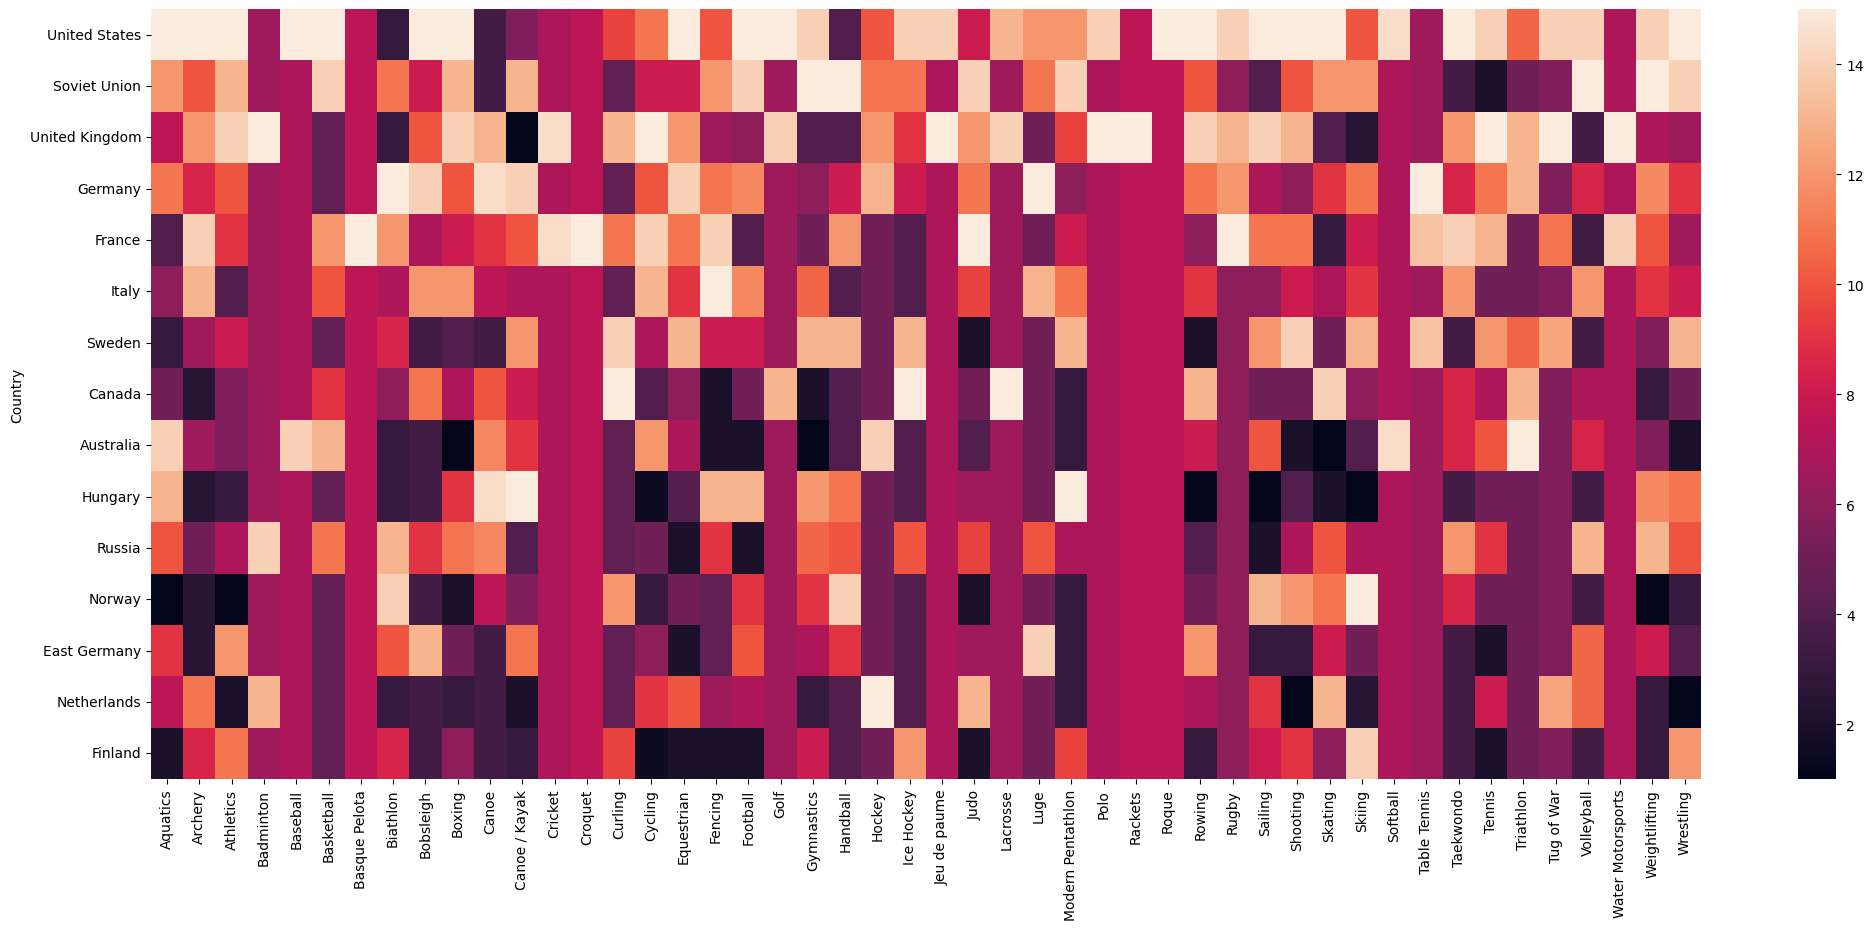

In [23]:
# Get top 15 countries
top_15=dictionary.sort_values(by="count", ascending=False).head(15)
top_15=top_15[["Country"]].reset_index()

# Remove Duplicate/Unnecessay columns
del top_15["index"]

# Get the sport grouping data based on country
temp=olympics3.groupby(["Country","Sport"]).size().unstack()

# merge the above df's
top_15=pd.merge(top_15,temp,on="Country",how="left")

# Give the country name as index
top_15.set_index("Country",inplace=True)

# Fill the null values
top_15 = top_15.fillna(0)

# Rank them
top_15=top_15.rank()

plt.figure(figsize=(25, 10))
sns.heatmap(top_15)
plt.show()

## END